In [39]:
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import os
import prepare
import acquire
import prepare
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns

import matplotlib.pyplot as plt

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [5]:
iris_df = acquire.get_iris_data()
iris_df

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa
5,5,1,6,5.4,3.9,1.7,0.4,setosa
6,6,1,7,4.6,3.4,1.4,0.3,setosa
7,7,1,8,5.0,3.4,1.5,0.2,setosa
8,8,1,9,4.4,2.9,1.4,0.2,setosa
9,9,1,10,4.9,3.1,1.5,0.1,setosa


Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [6]:
iris_df.describe()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


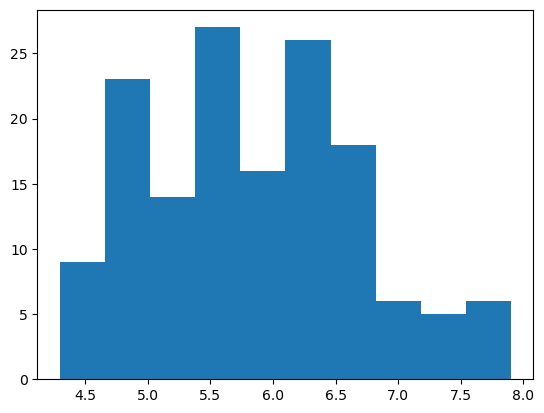

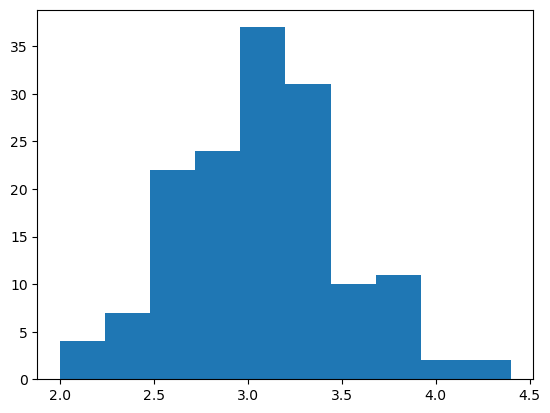

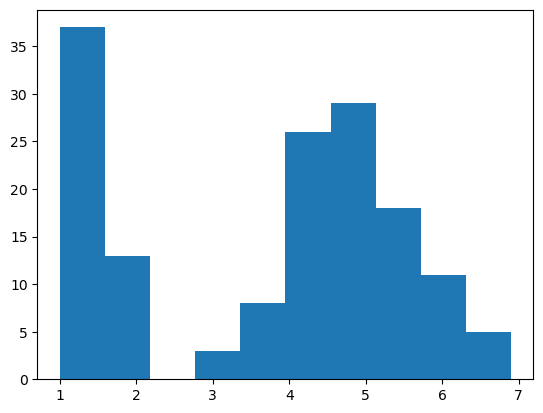

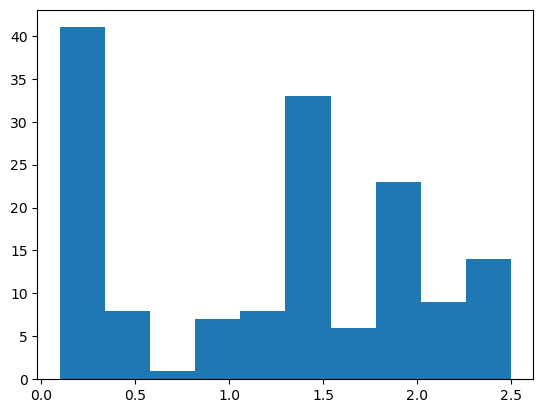

In [10]:
plt.hist(iris_df.sepal_length)
plt.show()
plt.hist(iris_df.sepal_width)
plt.show()   
plt.hist(iris_df.petal_length)
plt.show()
plt.hist(iris_df.petal_width)
plt.show()

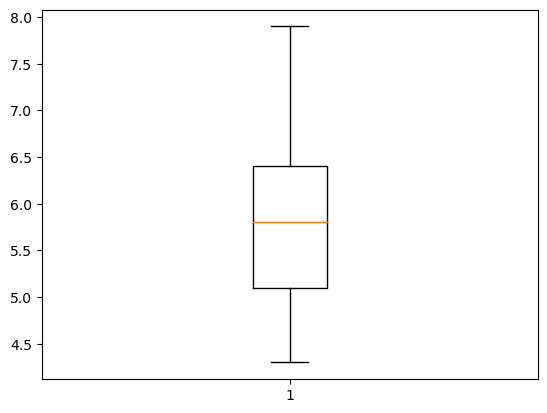

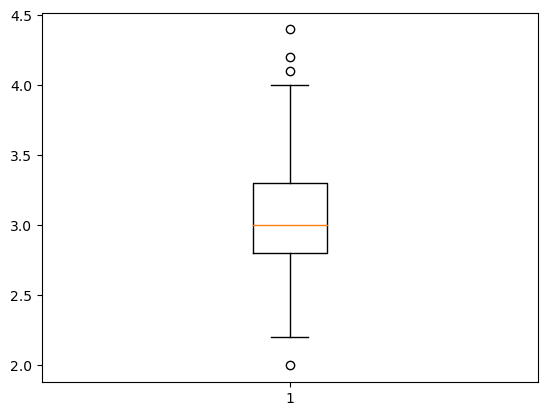

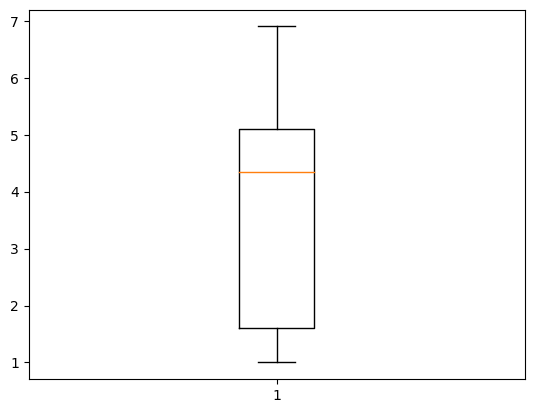

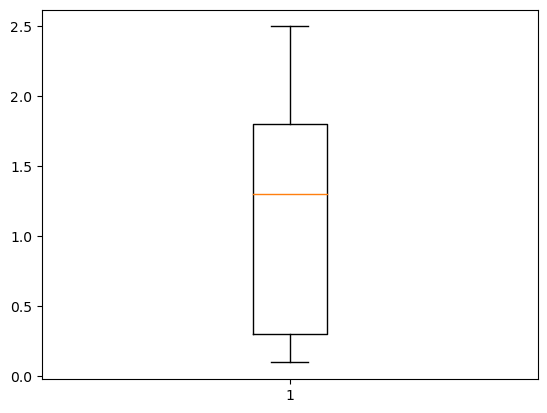

In [11]:
plt.boxplot(iris_df.sepal_length)
plt.show()
plt.boxplot(iris_df.sepal_width)
plt.show()   
plt.boxplot(iris_df.petal_length)
plt.show()
plt.boxplot(iris_df.petal_width)
plt.show()

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [16]:
df_iris=pd.DataFrame(iris_df, columns=['species_name','species_id'])
df_iris.value_counts()

species_name  species_id
setosa        1             50
versicolor    2             50
virginica     3             50
dtype: int64

Document takeaways & any actions.

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

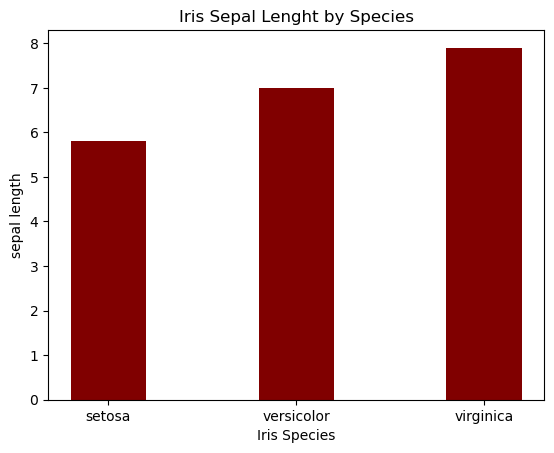

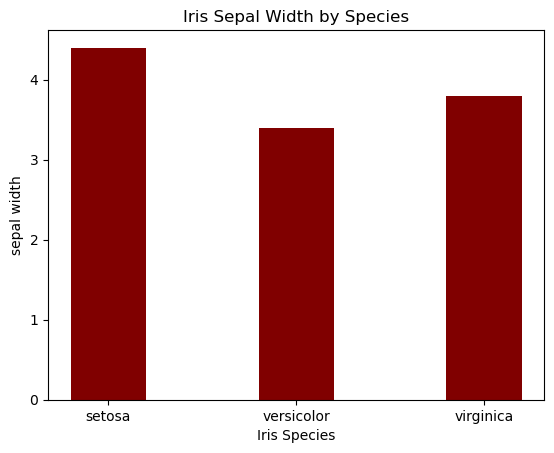

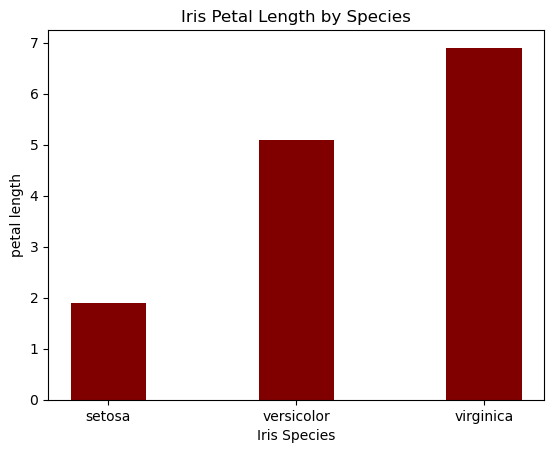

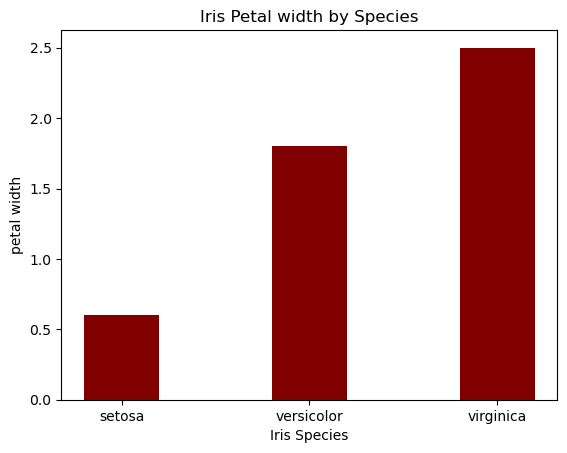

In [18]:
plt.bar(iris_df.species_name, iris_df.sepal_length, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("sepal length")
plt.title("Iris Sepal Lenght by Species")
plt.show()

plt.bar(iris_df.species_name, iris_df.sepal_width, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("sepal width")
plt.title("Iris Sepal Width by Species")
plt.show()

plt.bar(iris_df.species_name, iris_df.petal_length, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("petal length")
plt.title("Iris Petal Length by Species")
plt.show()

plt.bar(iris_df.species_name, iris_df.petal_width, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("petal width")
plt.title("Iris Petal width by Species")
plt.show()

For each measurement type, compute the descriptive statistics for each species.

In [20]:
df_iris_num=pd.DataFrame(iris_df, columns=['petal_length','petal_width', 'sepal_length','sepal_width','species_name'])
df_iris_num.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,3.758000,1.199333,5.843333,3.057333
std,1.765298,0.762238,0.828066,0.435866
min,1.000000,0.100000,4.300000,2.000000
25%,1.600000,0.300000,5.100000,2.800000
50%,4.350000,1.300000,5.800000,3.000000
75%,5.100000,1.800000,6.400000,3.300000
max,6.900000,2.500000,7.900000,4.400000


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [37]:
vir_iris = iris_df[iris_df.species_name == 'virginica'].drop(['species_id', 'measurement_id'], axis=1)
vir_iris

ver_iris = iris_df[iris_df.species_name == 'versicolor'].drop(['species_id', 'measurement_id'], axis=1)
ver_iris

print(stats.mannwhitneyu(vir_iris.petal_width, ver_iris.petal_width, alternative='two-sided'))
print(stats.mannwhitneyu(vir_iris.petal_length, ver_iris.petal_length, alternative='two-sided'))
print(stats.mannwhitneyu(vir_iris.sepal_width, ver_iris.sepal_width, alternative='two-sided'))
print(stats.mannwhitneyu(vir_iris.sepal_length, ver_iris.sepal_length, alternative='two-sided'))



MannwhitneyuResult(statistic=2451.0, pvalue=9.698045444914185e-17)
MannwhitneyuResult(statistic=2455.5, pvalue=9.133544727668256e-17)
MannwhitneyuResult(statistic=1659.0, pvalue=0.004572142206879863)
MannwhitneyuResult(statistic=1974.0, pvalue=5.869006410664197e-07)


Document takeaways & any actions.

across all measurment stats there is a significant difference between versicolor and virginica

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_33672/2089927331.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris12 = ver_iris.append(vir_iris)


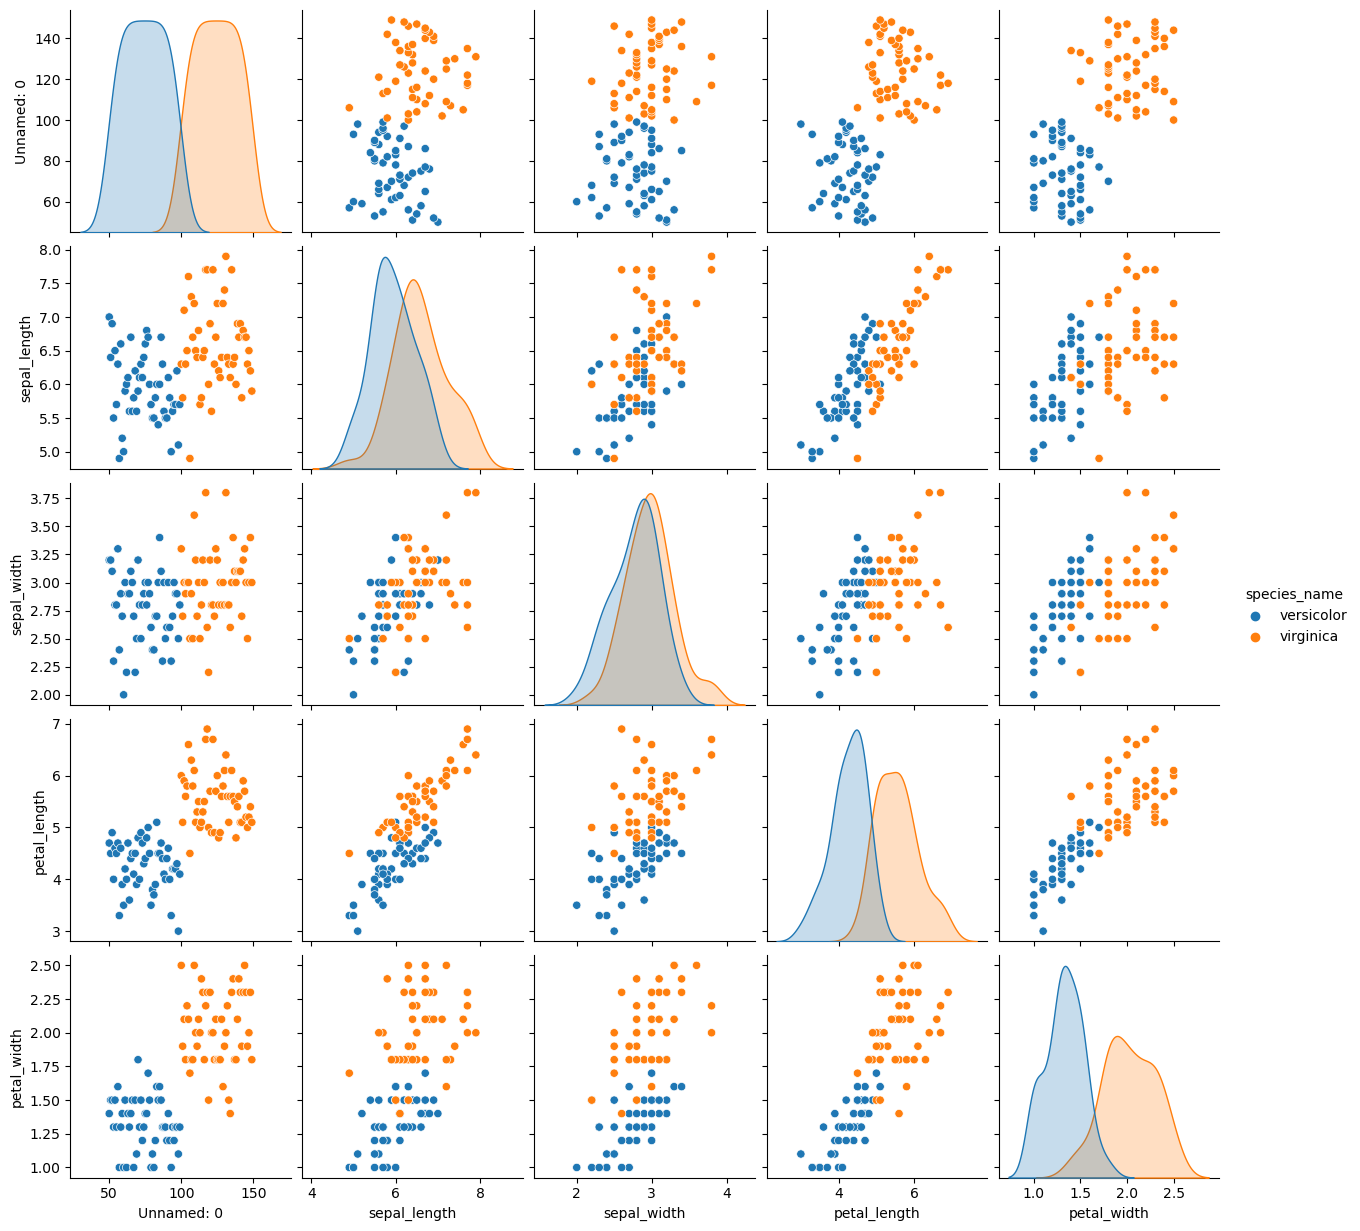

In [40]:
iris12 = ver_iris.append(vir_iris)
sns.pairplot(iris12, hue="species_name")

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

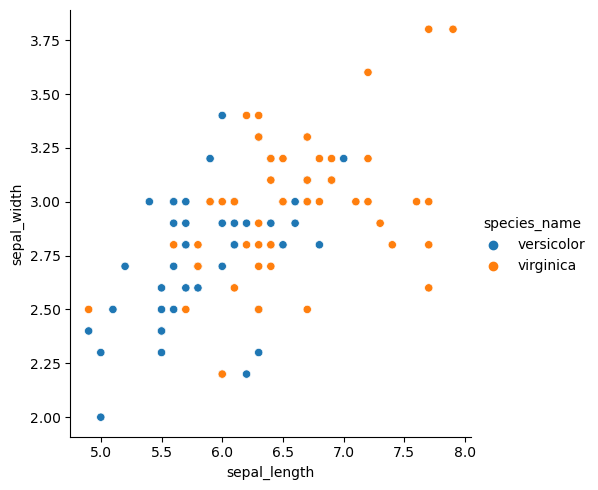

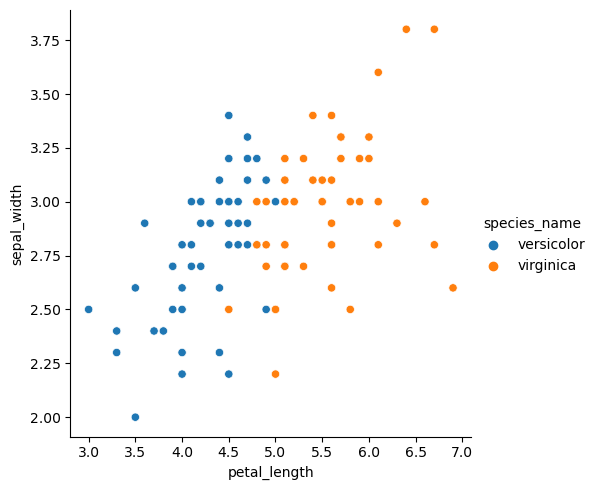

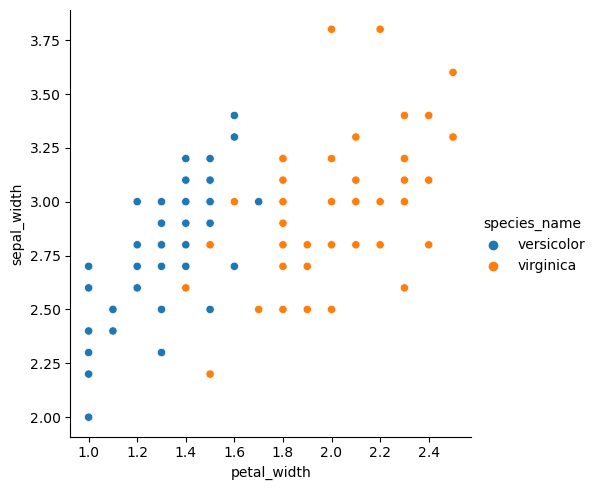

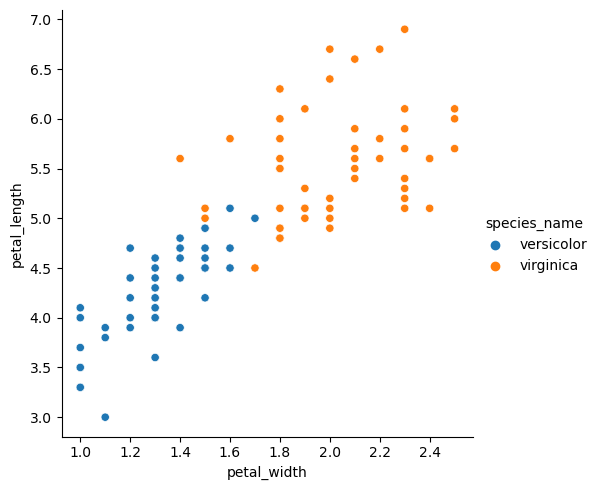

In [43]:
sns.relplot(data=iris12, x="sepal_length", y="sepal_width", hue="species_name")
plt.show()
sns.relplot(data=iris12, x="petal_length", y="sepal_width", hue="species_name")
plt.show()
sns.relplot(data=iris12, x="petal_width", y="sepal_width", hue="species_name")
plt.show()
sns.relplot(data=iris12, x="petal_width", y="petal_length", hue="species_name")
plt.show()

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

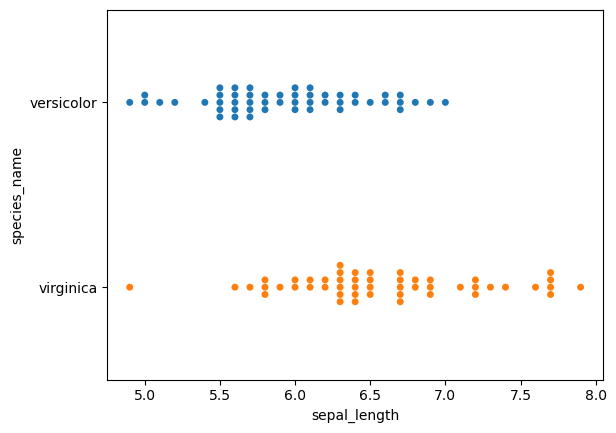

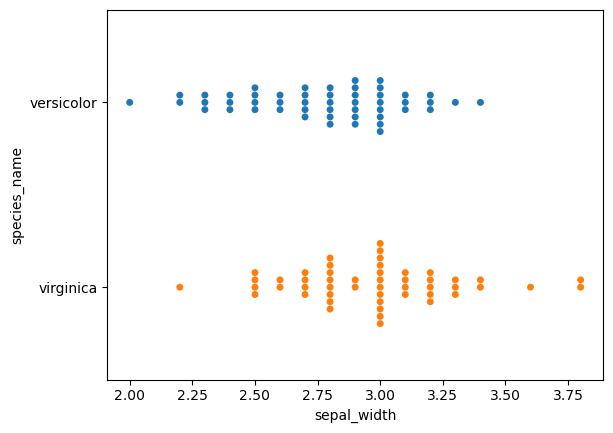

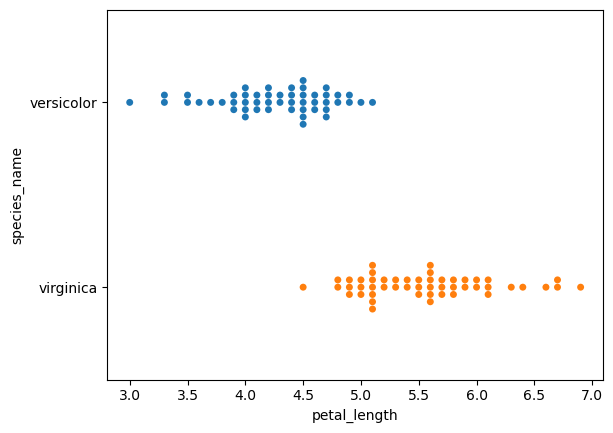

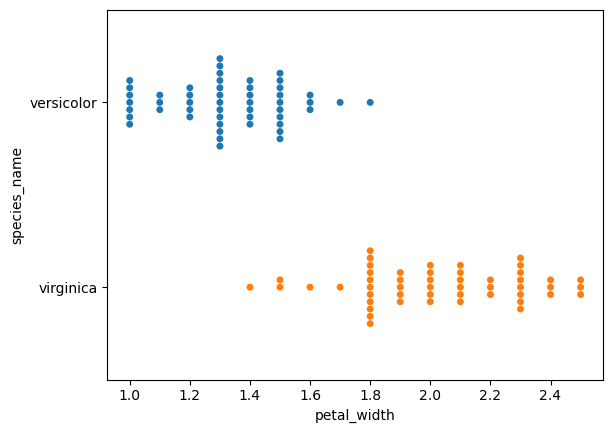

In [45]:
sns.swarmplot(data=iris12, x="sepal_length", y="species_name")
plt.show()
sns.swarmplot(data=iris12, x="sepal_width", y="species_name")
plt.show()
sns.swarmplot(data=iris12, x="petal_length", y="species_name")
plt.show()
sns.swarmplot(data=iris12, x="petal_width", y="species_name")
plt.show()

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

is sepal width significantly different across virginica and versicolor?  
h0: there is no significant difference  
hA: there is a significant difference  

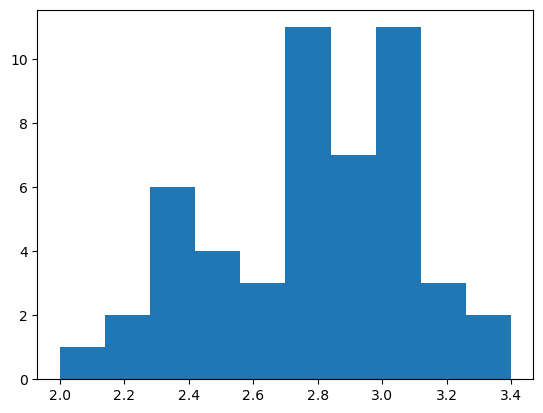

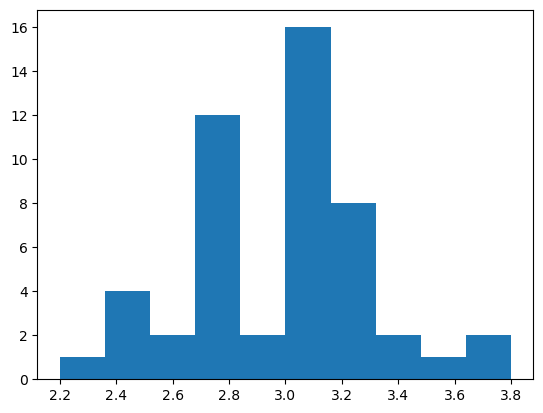

In [48]:
plt.hist(ver_iris.sepal_width)
plt.show()
plt.hist(vir_iris.sepal_width)
plt.show()

In [49]:
stats.ttest_ind(ver_iris.sepal_width, vir_iris.sepal_width)

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)

Document takeaways and any actions.

our null hypothesis is rejected by the low P

Part II
Explore your titanic dataset more completely.

Determine drivers of the target variable

Determine if certain columns should be dropped

In [53]:
titanic_df = acquire.get_titanic_data()
titanic_df.drop([titanic_df.columns[0], 'passenger_id', 'deck', 'embarked','class'], axis = 1, inplace = True)

titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Determine if it would be valuable to bin some numeric columns

In [59]:
#age binning and fare binning could be helpful
titanic_df.loc[titanic_df.age.between(0,18, 'both'), 'age_group'] = 'child'
titanic_df.loc[titanic_df.age.between(18, 30, 'right'), 'age_group'] = 'young adult'
titanic_df.loc[titanic_df.age.between(30,50, 'right'), 'age_group'] = 'adult'
titanic_df.loc[titanic_df.age.between(50,90, 'right'), 'age_group'] = 'elderly'

titanic_df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,age_group
0,0,3,male,22.0,1,0,7.2500,Southampton,0,young adult
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,adult
2,1,3,female,26.0,0,0,7.9250,Southampton,1,young adult
3,1,1,female,35.0,1,0,53.1000,Southampton,0,adult
4,0,3,male,35.0,0,0,8.0500,Southampton,1,adult
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Queenstown,0,adult
886,0,2,male,27.0,0,0,13.0000,Southampton,1,young adult
887,1,1,female,19.0,0,0,30.0000,Southampton,1,young adult
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,young adult


Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

Part III
Explore your telco data to discover drivers of churn

In [63]:
telco_df = acquire.get_telco_data()
telco_df.describe()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,2033.283305,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1760.500000,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,3521.000000,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,5281.500000,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,7042.000000,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


Determine if certain columns should be dropped

In [61]:
telco_df.drop([telco_df.columns[0], 'payment_type_id','internet_service_type_id','contract_type_id'], axis = 1, inplace = True)

Determine if it would be valuable to bin some numeric columns

In [78]:
#binning tenure could be helpful
telco_df.loc[telco_df.tenure.between(0,24, 'both'), 'tenure_group'] = 'short tenure'
telco_df.loc[telco_df.tenure.between(24, 48, 'right'), 'tenure_group'] = 'two_four'
telco_df.loc[telco_df.tenure.between(48,72, 'right'), 'tenure_group'] = 'four_three'


In [79]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

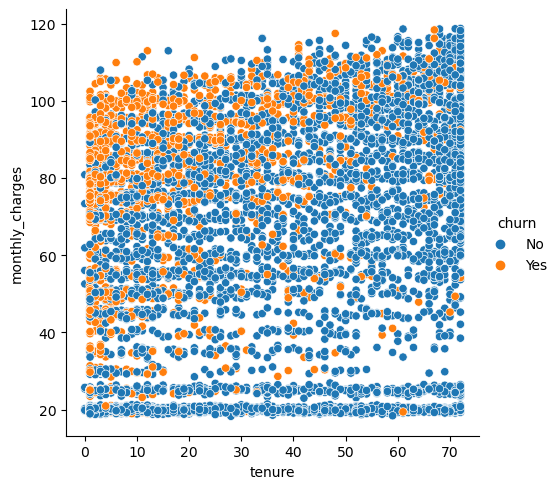

In [83]:
sns.relplot(data=telco_df, x="tenure", y="monthly_charges", hue="churn")
plt.show()

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.